In [57]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [31]:
# Cargar el dataset
file_path = 'data_evaluacion.csv'
data = pd.read_csv(file_path)
print(data.head())

   39         State-gov   77516  Bachelors  13       Never-married  \
0  50  Self-emp-not-inc   83311  Bachelors  13  Married-civ-spouse   
1  38           Private  215646    HS-grad   9            Divorced   
2  53           Private  234721       11th   7  Married-civ-spouse   
3  28           Private  338409  Bachelors  13  Married-civ-spouse   
4  37           Private  284582    Masters  14  Married-civ-spouse   

        Adm-clerical  Not-in-family  White    Male  2174  0  40  \
0    Exec-managerial        Husband  White    Male     0  0  13   
1  Handlers-cleaners  Not-in-family  White    Male     0  0  40   
2  Handlers-cleaners        Husband  Black    Male     0  0  40   
3     Prof-specialty           Wife  Black  Female     0  0  40   
4    Exec-managerial           Wife  White  Female     0  0  40   

   United-States  <=50K  
0  United-States  <=50K  
1  United-States  <=50K  
2  United-States  <=50K  
3           Cuba  <=50K  
4  United-States  <=50K  


In [32]:
# Reemplazar valores "?" con "Unknown"
data = data.replace(' ?', 'Unknown')

In [33]:
# Codificación de variables categóricas usando One-Hot Encoding
categorical_columns = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_columns)

In [34]:
# Estandarización de las variables numéricas
scaler = StandardScaler()
numerical_columns = data.select_dtypes(include=['int64']).columns
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

In [35]:
# Separar características y etiquetas
X = data_encoded.drop(columns=['<=50K_<=50K', '<=50K_>50K'])
y = data_encoded['<=50K_>50K']

In [36]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# Construir el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\Notebook-ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [39]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8267 - loss: 0.3625 - val_accuracy: 0.8516 - val_loss: 0.3158
Epoch 2/50
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8595 - loss: 0.3037 - val_accuracy: 0.8528 - val_loss: 0.3124
Epoch 3/50
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8593 - loss: 0.3024 - val_accuracy: 0.8527 - val_loss: 0.3128
Epoch 4/50
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8617 - loss: 0.2959 - val_accuracy: 0.8527 - val_loss: 0.3115
Epoch 5/50
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8611 - loss: 0.2975 - val_accuracy: 0.8524 - val_loss: 0.3125
Epoch 6/50
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8645 - loss: 0.2912 - val_accuracy: 0.8499 - val_loss: 0.3132
Epoch 7/50
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8648 - loss: 0.2889 - val_accuracy: 0.8536 - val_loss: 0.3117
Epoch 8/50
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8671 - loss: 0.2845 - 

In [40]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

Loss: 0.4104984998703003
Accuracy: 0.8394922614097595


In [44]:
# Predicciones del modelo
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int) 

306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [55]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[6761  703]
 [ 865 1440]]


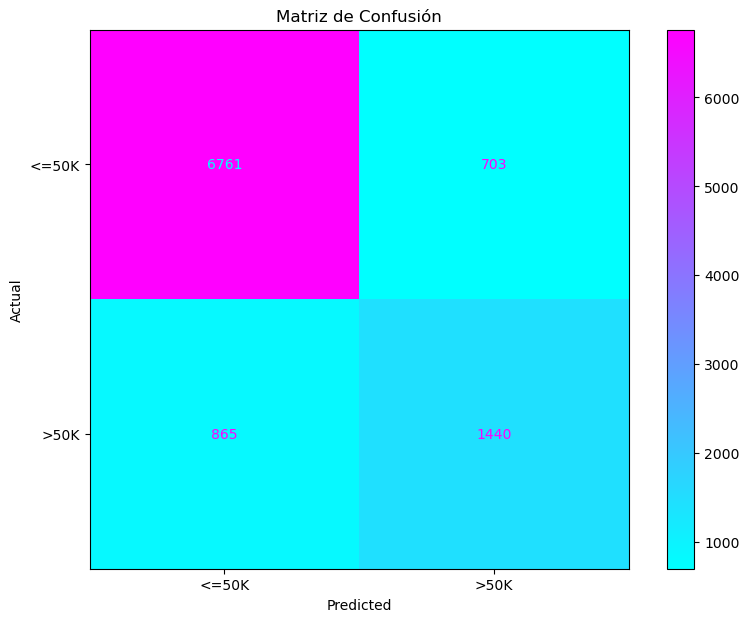

In [60]:
# Graficar la matriz de confusión 
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['<=50K', '>50K'])
fig, ax = plt.subplots(figsize=(10, 7))
disp.plot(ax=ax, cmap=plt.cm.cool)
plt.title('Matriz de Confusión')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [46]:
# Reporte de clasificación
class_report = classification_report(y_test, y_pred_classes)
print("Reporte de Clasificación:")
print(class_report)

Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.89      0.91      0.90      7464
        True       0.67      0.62      0.65      2305

    accuracy                           0.84      9769
   macro avg       0.78      0.77      0.77      9769
weighted avg       0.84      0.84      0.84      9769



In [19]:
# Graficar la precisión y la pérdida
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

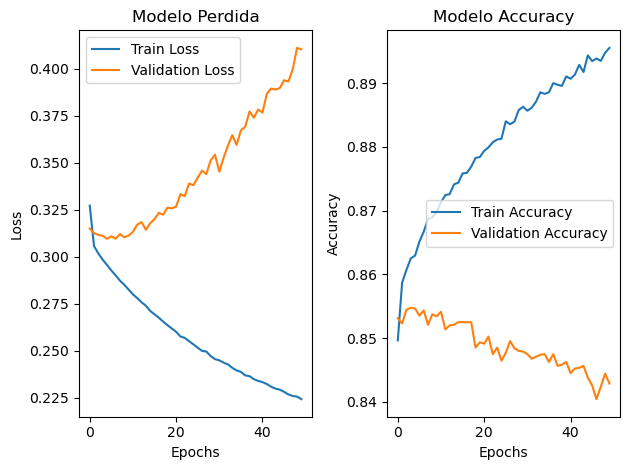

In [25]:
# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Modelo Perdida')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Modelo Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [62]:
# Evaluar underfitting o overfitting
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

print(f'Training Loss: {train_loss}')
print(f'Validation Loss: {val_loss}')
print(f'Training Accuracy: {train_acc}')
print(f'Validation Accuracy: {val_acc}')

if train_loss > val_loss:
    print("Puede que haya un underfiting .")
elif train_loss < val_loss:
    print("Puede que haya un overfiting .")
else:
    print("El modelo está bien ajustado.")

Training Loss: 0.22044816613197327
Validation Loss: 0.4104984998703003
Training Accuracy: 0.8965243697166443
Validation Accuracy: 0.8394922614097595
Puede que haya un overfiting .


Conclusion:
Al utilizar RNA (redes neuronales artificiales) nos da un accuracy de 0.84 lo que menciona un entrenamiento humano por lo cual nos indica un overfiting que hace referencia a que tiene un sobreajuste que nos indica que aprendio a reconocer los patrones.